Импорт используемых библиотек

In [10]:
from Solve import solve_for_one_well_explicit
import matplotlib.pyplot as plt
import math as m
from well import Well
import numpy as np
import seaborn as sns

Функция для выбора шага по пространству для равномерной сетки, чтобы все скважины попали в центры контрольных объемов

In [11]:
def choose_step(length, width, x_wells, y_wells):
    dx, dy = m.gcd(length, *x_wells), m.gcd(width, *y_wells)
    return dx, dy


Задание данных скважин: координаты по х и у, радиус ствола, постоянный дебит и номер

In [12]:
# данные для скважин скважины
wells = [
    Well(2550, 2550, 1.5, 800, 1),
    Well(3700, 750, 1.5, 1000, 2),
    Well(255, 755, 1.5, -1000, 3),
    Well(1000, 3700, 1.5, -1000, 4),
]

Ввод входных значений

In [13]:
# Ввод входных значений
length, width = 4000, 4000  # [м] геометрические размеры рассчитываемой области
dx, dy = choose_step(length, width, [well.x_w for well in wells],
                     [well.y_w for well in wells])  # [м] шаг по направлениям
Nx, Ny = int(length / dx) + 1, int(width / dy) + 1  # количество элементов
X = np.linspace(0, length, Nx)
Y = np.linspace(0, width, Ny)
T = 10 * 365

B = 1.2  # Объемный коэффициент
h = 10  # толщина пласта

# параметры взяты плюс-минус от балды
viscosity = 10  # Вязкость [сПз] = 10e-3 [Па * с]
compressibility = 5 * 10e-9  # [1/Па] сжимаемость
permeability = 100  # [мД] проницаемость - скаляр
eta = 1.0
coef = - B * viscosity / 2 / np.pi / permeability / h  # вспомогательный коэффициент


Расчеты давлений

In [14]:
pressure_start = np.full((Nx, Ny), 0.0)
pressure_start[0, :] = 0
pressure_start[-1, :] = 0
pressure_start[:, 0] = 0
pressure_start[:, -1] = 0
pressure = pressure_start.copy()

for well in wells:
    # Используем явный метод
    well.pressure_field, well.pressure_well, well.time_well = solve_for_one_well_explicit(X.copy(), Y.copy(), well.x_w, well.y_w, well.q, well.r_w, coef, pressure_start.copy(), T, eta)

    pressure += well.pressure_field

Визуализация результатов

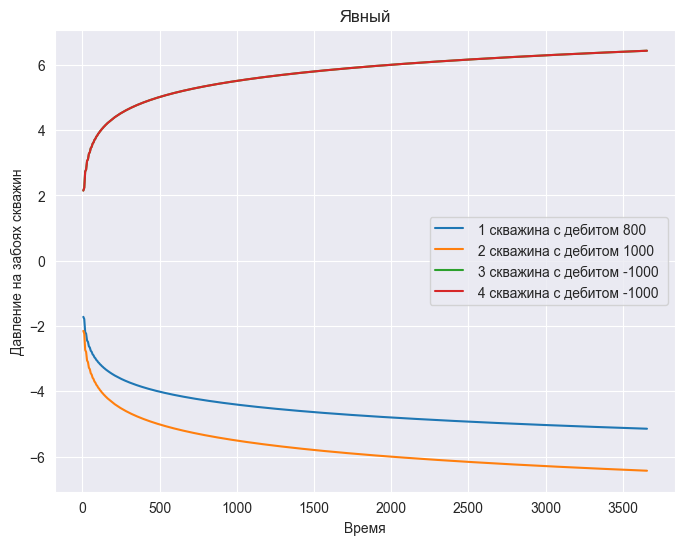

Solarize_Light2


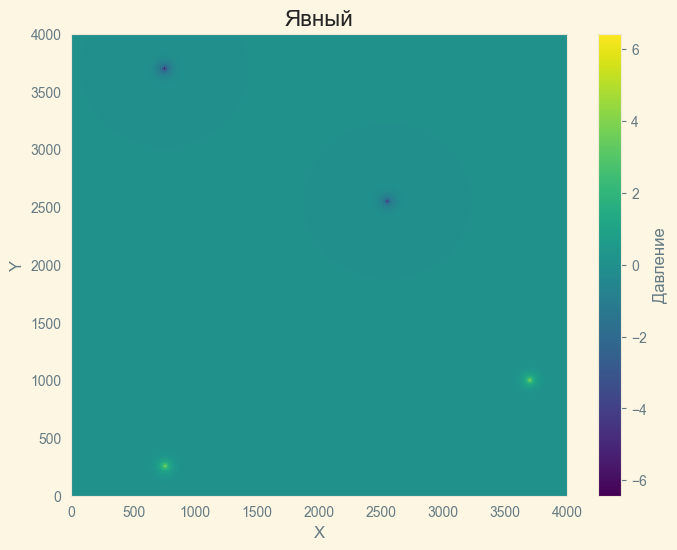

nvnn
_classic_test_patch


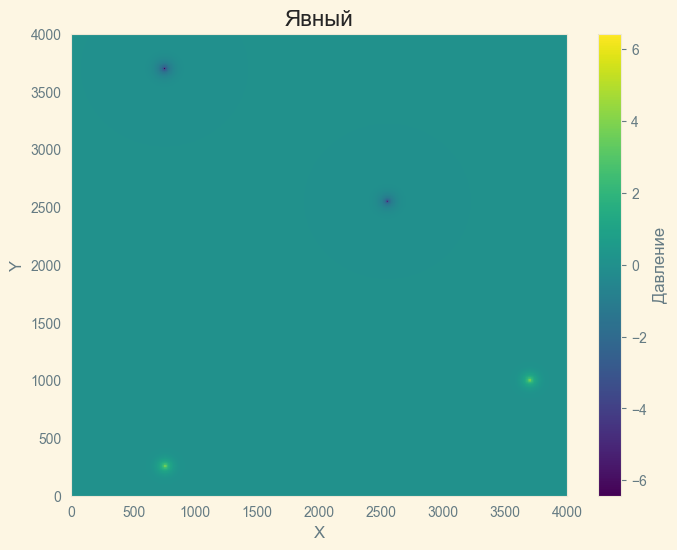

nvnn
_mpl-gallery


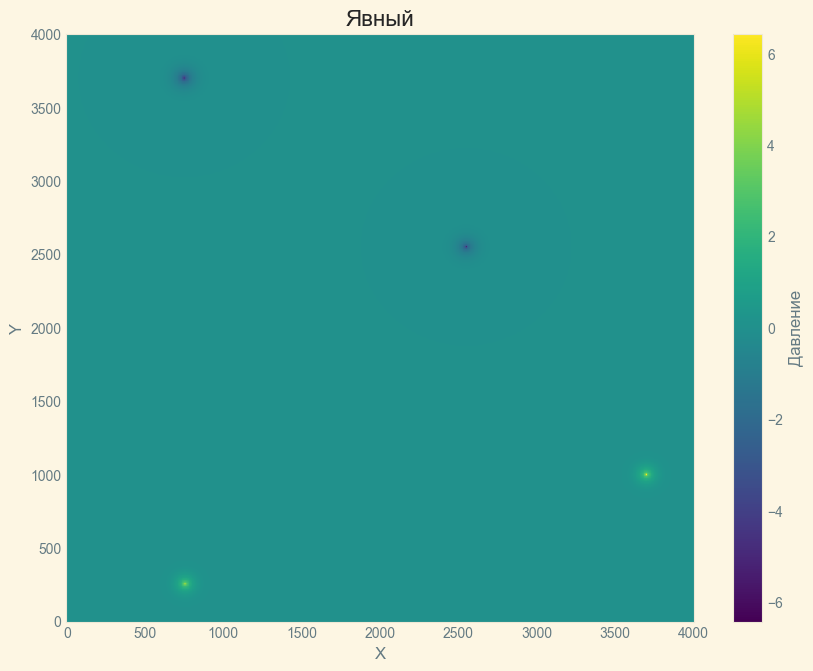

nvnn
_mpl-gallery-nogrid


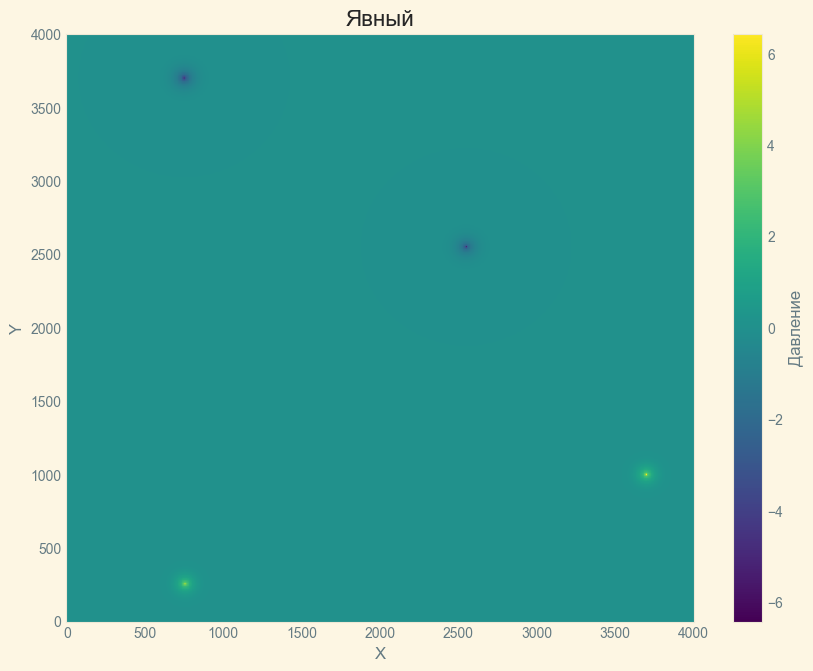

nvnn
bmh


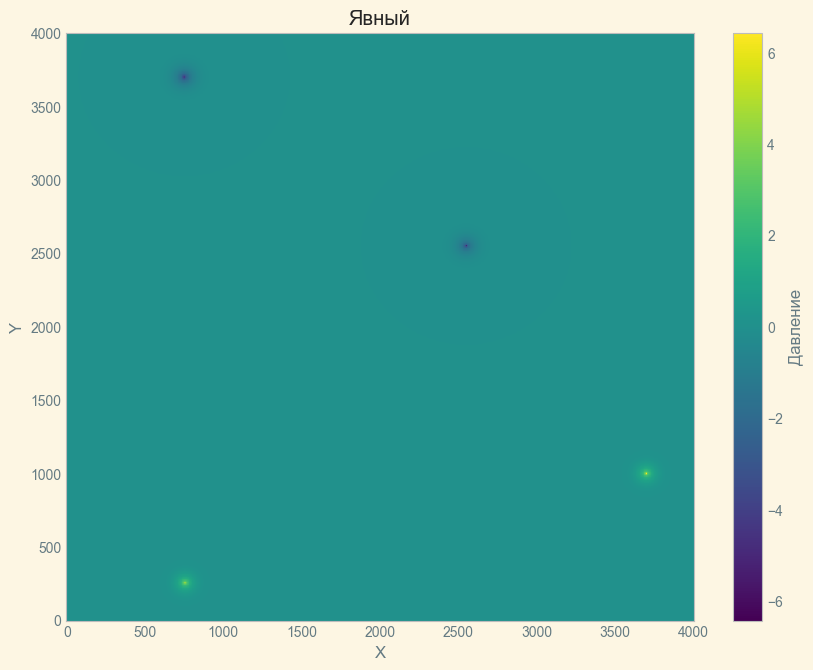

nvnn
classic


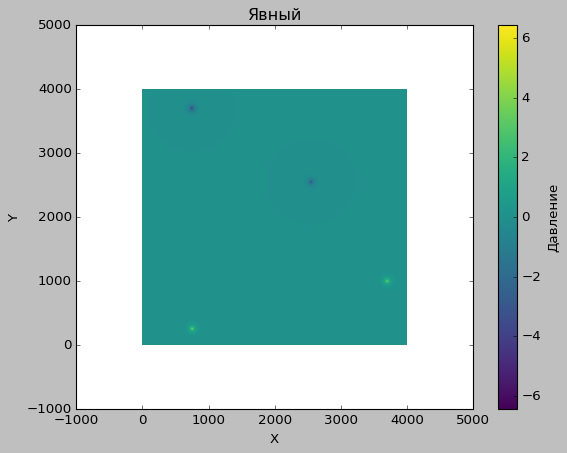

nvnn
dark_background


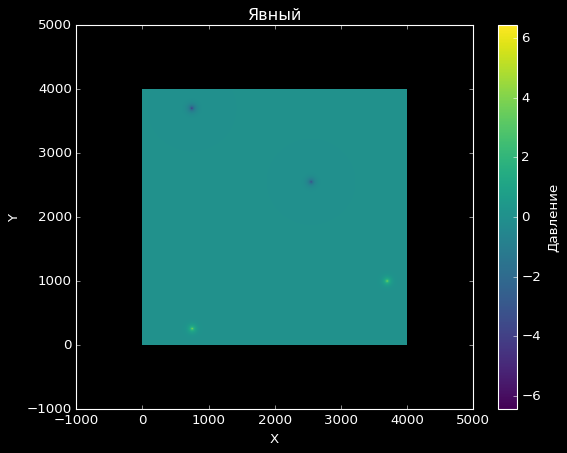

nvnn
fast


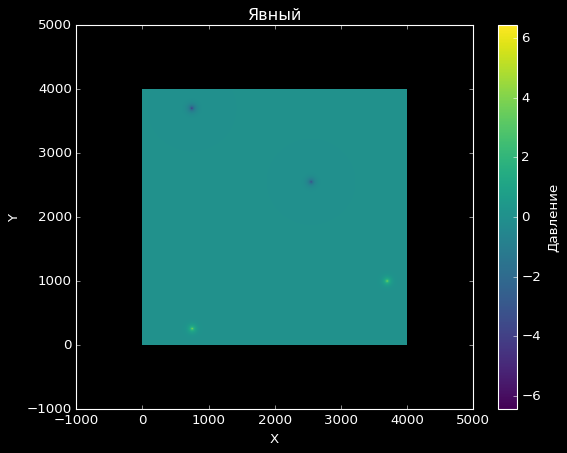

nvnn
fivethirtyeight


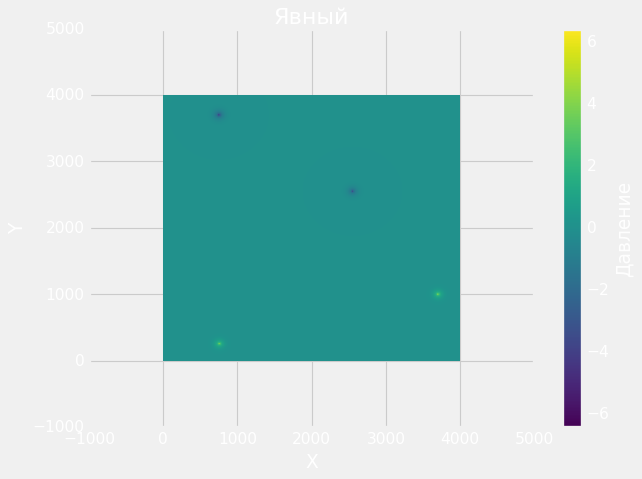

nvnn
ggplot


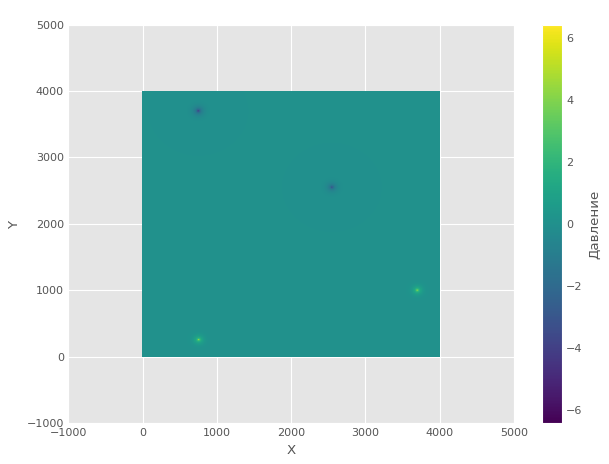

nvnn
grayscale


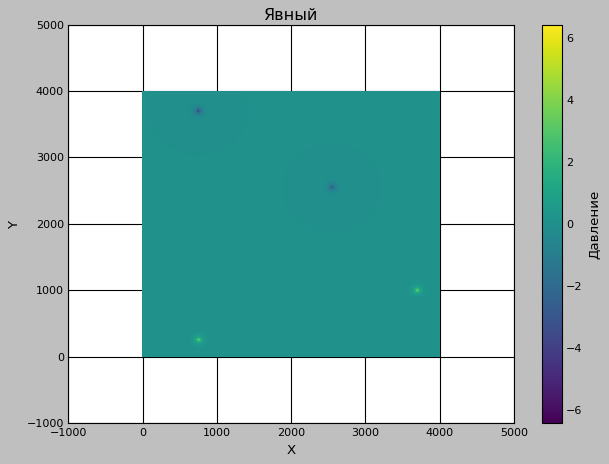

nvnn
seaborn-v0_8


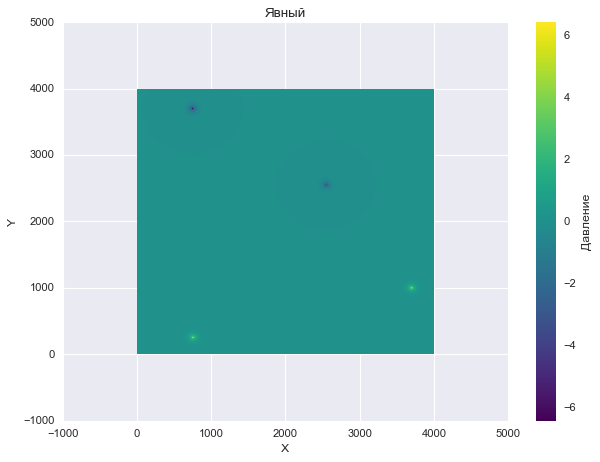

nvnn
seaborn-v0_8-bright


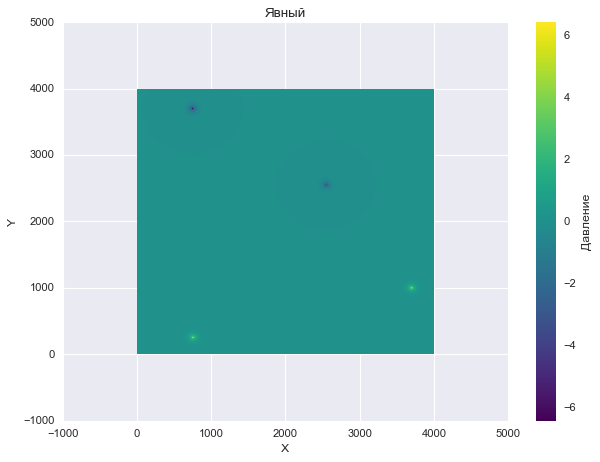

nvnn
seaborn-v0_8-colorblind


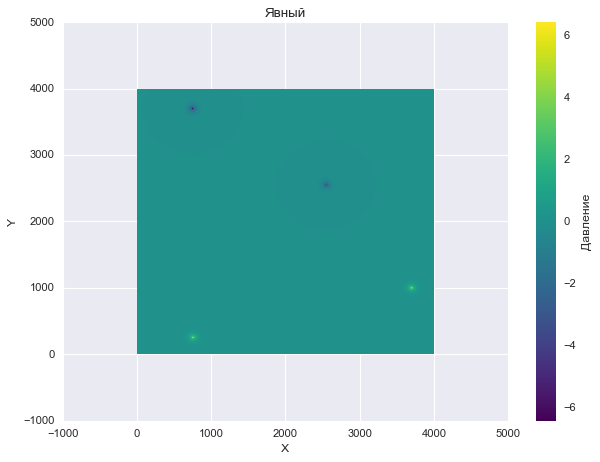

nvnn
seaborn-v0_8-dark


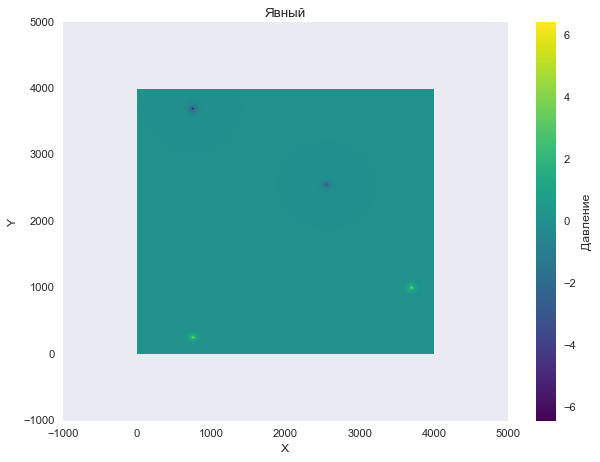

nvnn
seaborn-v0_8-dark-palette


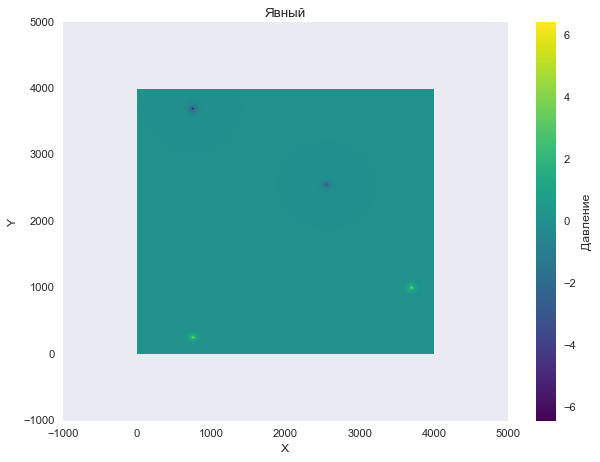

nvnn
seaborn-v0_8-darkgrid


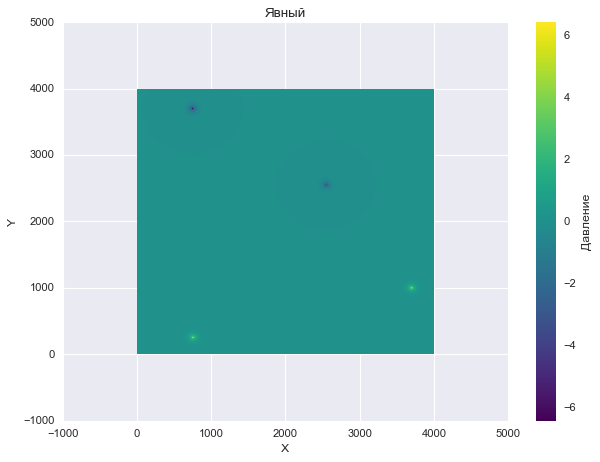

nvnn
seaborn-v0_8-deep


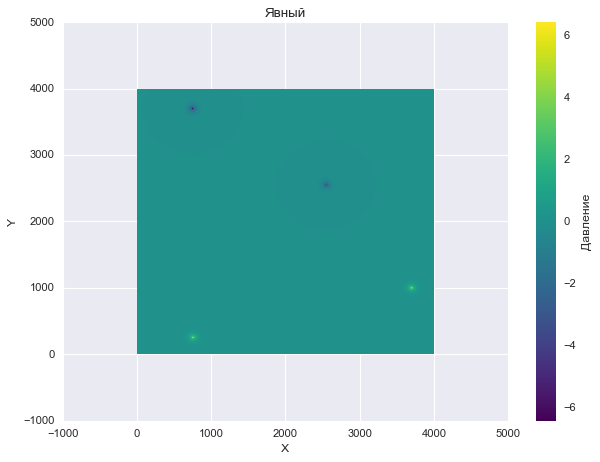

nvnn
seaborn-v0_8-muted


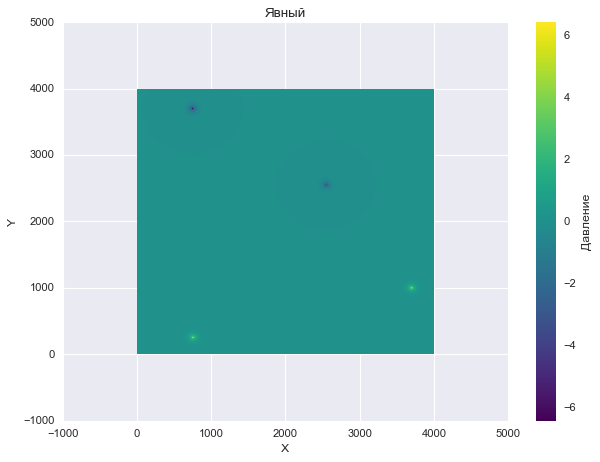

nvnn
seaborn-v0_8-notebook


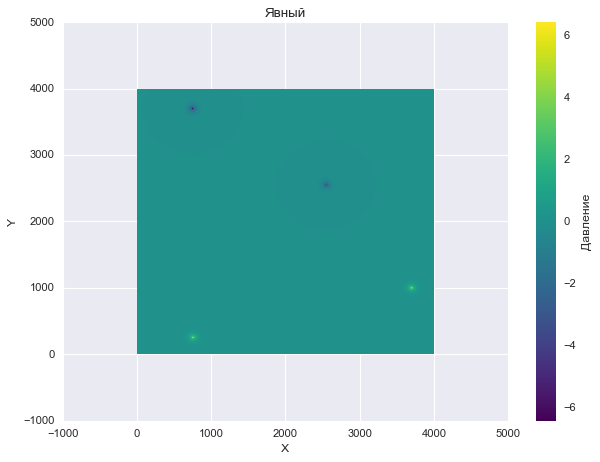

nvnn
seaborn-v0_8-paper


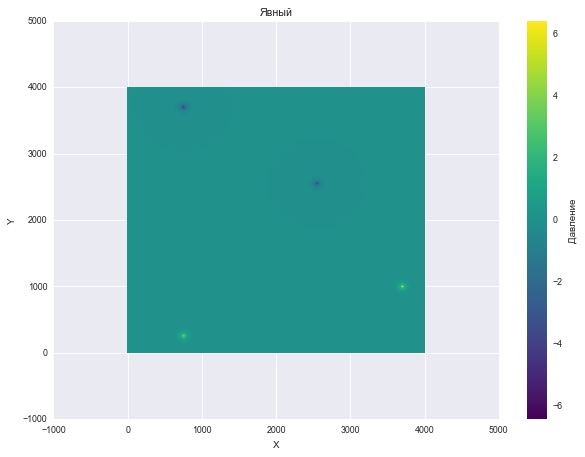

nvnn
seaborn-v0_8-pastel


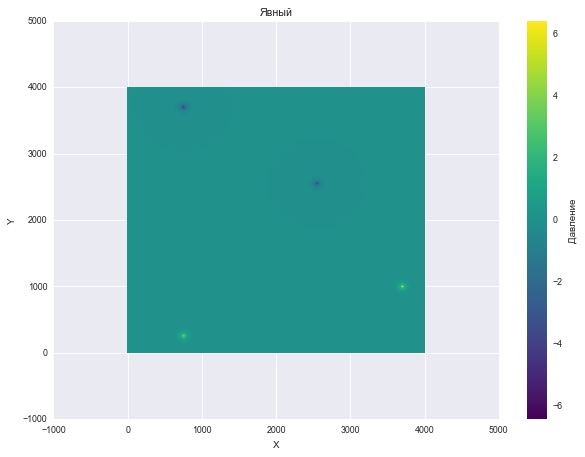

nvnn
seaborn-v0_8-poster


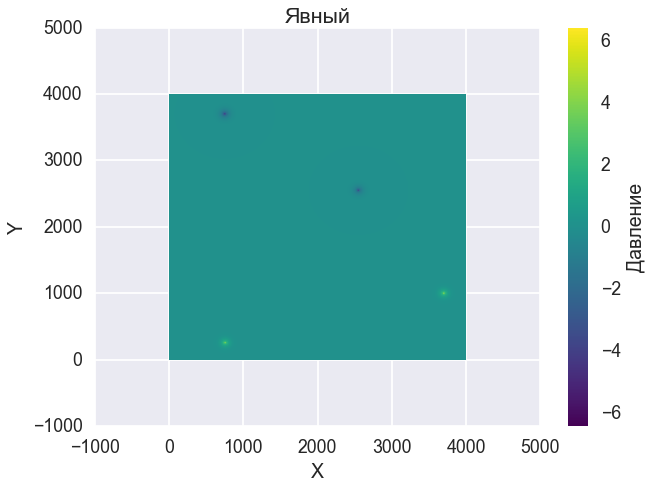

nvnn
seaborn-v0_8-talk


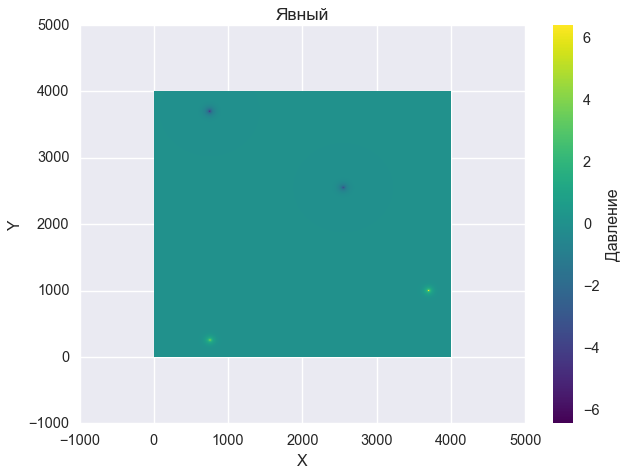

nvnn
seaborn-v0_8-ticks


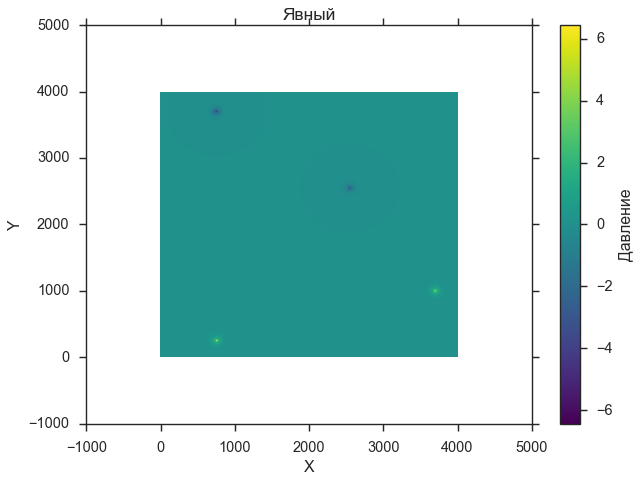

nvnn
seaborn-v0_8-white


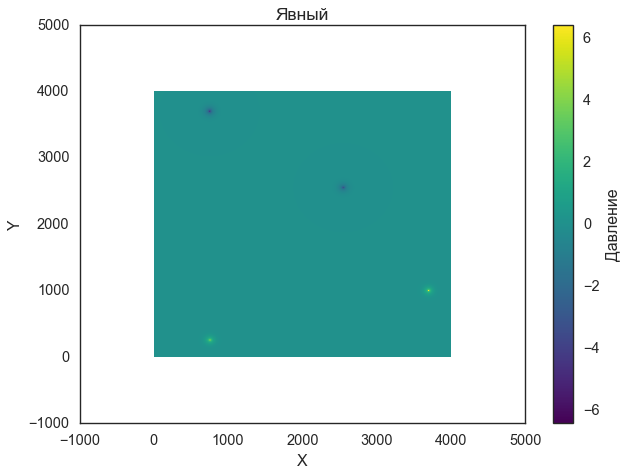

nvnn
seaborn-v0_8-whitegrid


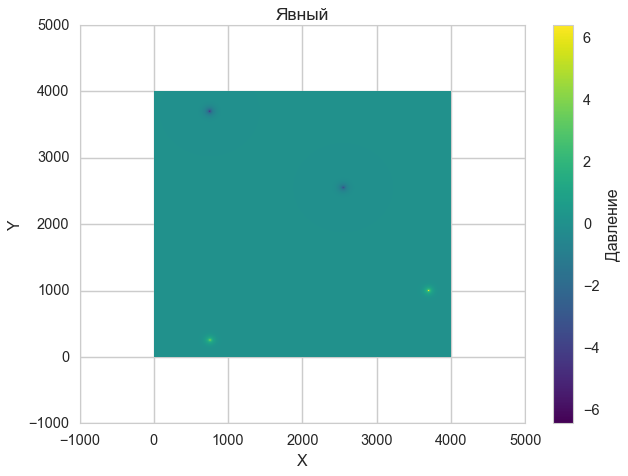

nvnn
tableau-colorblind10


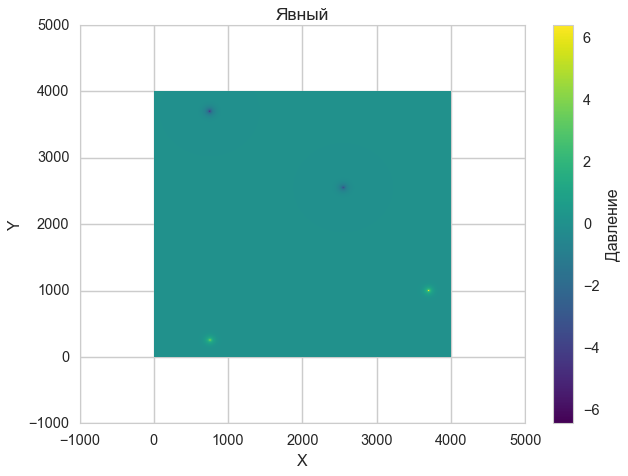

nvnn


In [18]:
fig, ax = plt.subplots(figsize=(8, 6), gridspec_kw={'hspace': 0})
for well in wells:
    ax.plot(well.time_well, well.pressure_well)
ax.set_xlabel('Время')
ax.set_title('Явный')
ax.set_ylabel('Давление на забоях скважин')
ax.legend([f' {well.number} скважина c дебитом {well.q} ' for well in wells])
plt.show()

for style in plt.style.available:
    plt.style.use(style)
    print(style)
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.pcolormesh(X, Y, pressure, shading='auto', cmap='viridis')
    cbar = plt.colorbar(cax, label='Давление')
    ax.set_title(f'Распределение давления через {T} дней')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Явный')
    plt.show()
    print("nvnn")

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
